In [33]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt


import ptitprince as pt

# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
#yyyy,mm,tmax,tmin, af,rain,sun
data = pd.read_csv("smalldata.csv",sep=',',header=0) #spotify.csv
# Preview the first 5 lines of the loaded data 
data.head()

,X,genre,loudness
0,1,Dance,-5.290
1,2,Dance,-10.744
2,3,Dance,-7.050
3,4,Dance,-7.948
4,5,Dance,-6.891


In [34]:
data.shape

(36615, 3)

In [35]:
data.groupby(['genre']).count()

,X,loudness
genre,,
Classical,9256,9256
Dance,8701,8701
Pop,9386,9386
Rock,9272,9272


## Make a picture of this data

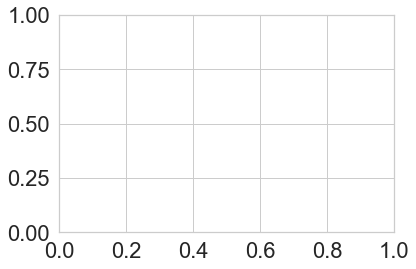

In [36]:
# plotting the clouds
fig, ax = plt.subplots()
#f, ax = plt.subplots(3,figsize=(50, 50))
dy="genre"; dx="loudness";  pal = [(0.596078431372549, 0.9607843137254902, 1.0)]#ort="h";


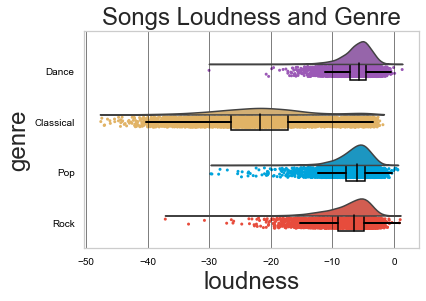

In [37]:
#flatui = ["#9b59b6", "#e1b366", "#95a5a6", "#e74c3c", "#34495e","#ccac00", "#2ecc71","#00526d","#c7c9cb","#3498db","#6dcff6","#de6e6e"]
flatui = ["#9b59b6", "#e1b366", "#00a4dc", "#e74c3c", "#00526d","#2ecc71", "#2ecc71","#00526d","#c7c9cb","#3498db","#6dcff6","#de6e6e"]

sns.set_palette(flatui)
#"muted"
plt=pt.half_violinplot( x = dx, y = dy, data = data, palette = flatui, bw = .2, cut = 0.1,
                      scale = "area", width = .9, inner = None )#,orient = ort
ax=sns.stripplot( x = dx, y = dy, data = data, palette = flatui, edgecolor = "white",
                 size = 3, jitter = 1, zorder = 0)#, orient = ort
ax=sns.boxplot( x = dx, y = dy, data = data, color = "black", width = .33,showcaps = False, boxprops = {'facecolor':'none'},showfliers=False, whiskerprops = {'linewidth':2},saturation = 1)#, orient = ort
#ax.set_xlabel('xlabel', fontsize=10)
ax.tick_params(direction='out', length=6, width=2, colors='black',
               grid_color='black', grid_alpha=0.5,labelsize =10)
#ax.update_xaxes(tickangle=0, tickfont=dict(family='Rockwell', color='black', size=14))
plt.plot()
plt.set_title("Songs Loudness and Genre")
plt.figure.savefig("fig.png", bbox_inches='tight')

## Ignore below for the moment. It is just some analysis and filtering

# issue with two names in Children's music

Children’s Music and Children's Music	are being mixed up
need to replace ’ in genre column with '

In [4]:
xxx data['genre'] = data['genre'].str.replace('’','\'')

In [5]:
data.groupby(['genre']).count()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
A Capella,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119
Alternative,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263
Anime,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936,8936
Blues,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023,9023
Children's Music,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756
Classical,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256
Comedy,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681,9681
Country,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664
Dance,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701,8701


In [6]:
data = data[data.genre != "A Capella"]
data = data[data.genre != "Comedy"]

In [7]:


#data = data[data.genre == "Electronic"]
data = data[data.genre != "Blues"]
#data = data[data.genre != "Hip-Hop"]
data = data[data.genre != "Indie"]
data = data[data.genre != "Soul"]
data = data[data.genre != "Movie"]
data = data[data.genre != "R&B"]
data = data[data.genre != "Reggaeton"]
data = data[data.genre != "Alternative"]
data = data[data.genre != "Anime"]
data = data[data.genre != "Opera"]
data = data[data.genre != "Ska"]
data = data[data.genre != "World"]
data = data[data.genre != "Soundtrack"]
data = data[data.genre != "Dance"]
data = data[data.genre != "Jazz"]
data = data[data.genre != "Rap"]
data = data[data.genre != "Reggae"]
data = data[data.genre != "Folk"]
data = data[data.genre != "Children's Music"]



data.groupby(['genre']).count()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
Classical,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256
Country,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664
Electronic,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377
Hip-Hop,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295
Pop,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386
Rock,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272


In [8]:
data.groupby(['genre']).count()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
genre,,,,,,,,,,,,,,,,,
Classical,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256,9256
Country,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664,8664
Electronic,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377
Hip-Hop,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295,9295
Pop,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386,9386
Rock,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272,9272


## Issue with songs that are too loud

In [14]:
data[data['loudness']>0.1]




,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
22632,Electronic,SVDDEN DEATH,Savceboys,5uWXtwnfK4xvLWSqvzT8Af,50,0.005680,0.619,193714,0.953,0.001760,A,0.6250,0.203,Major,0.2960,140.053,04月04日,0.1860
22764,Electronic,Herobust,WTF,07LCO1xsdnd1epIsqGAMz3,50,0.002580,0.589,257600,0.982,0.011200,C,0.1890,0.598,Major,0.3270,150.005,04月04日,0.2840
22908,Electronic,Borgore,Are You Sure Now?,4wysKuyN4GHPTRtOsbD981,50,0.014700,0.497,184552,0.990,0.000000,E,0.3260,0.594,Minor,0.3740,145.045,04月04日,0.1650
22944,Electronic,Justice,We Are Your Friends - Justice Vs Simian,49ErwcBYfYRPNBdRuPvpYA,61,0.010400,0.615,262773,0.970,0.384000,A,0.1780,1.342,Minor,0.1190,122.993,04月04日,0.5070
23505,Electronic,Valentino Khan,Slam Dunk (feat. Kstylis),2kSijCecfo9ywjCVpaFhcr,48,0.009780,0.717,217600,0.979,0.000156,A,0.0984,1.258,Major,0.1430,149.997,04月04日,0.5150
23804,Electronic,SVDDEN DEATH,Rise,4nsieT9XiaZk8LGK62TjT8,40,0.006840,0.753,205714,0.883,0.000000,E,0.0938,0.754,Major,0.2680,70.021,04月04日,0.2230
23993,Electronic,Bailo,Tear It Down,5O0HssN2SXcwqFobAJRNu0,37,0.034600,0.491,177633,0.993,0.000005,C#,0.1050,0.454,Major,0.4700,149.802,04月04日,0.5350
25203,Electronic,Barely Alive,Wack,52Tx4HfJMJegYF3JPgg4EN,41,0.002000,0.712,197867,0.920,0.002950,C#,0.1660,0.576,Major,0.1500,149.913,04月04日,0.4810
25270,Electronic,SVDDEN DEATH,Gates Of Hell,6hrJoTsK52uW9dzYUedNGq,35,0.003210,0.705,192000,0.975,0.000292,A#,0.2680,0.227,Minor,0.3770,72.529,04月04日,0.4090
25507,Electronic,SVDDEN DEATH,Break 'Em Down,11krp5c8FcNvVUzQ0U1bDO,35,0.003030,0.643,260571,0.927,0.003750,C#,0.0816,0.229,Major,0.1350,139.839,04月04日,0.2440


In [249]:
#data filter out songs that are too lod to be real


data = data[data['loudness']<0]

##11 songs have loudness over 0 which can't happen so i remove them

# Issue with songs that are too quiet

quiet songs actually seem real songs and not errors

In [15]:
quiet = data[data['loudness']<-52]


In [16]:
quiet.shape

(0, 18)

In [17]:
minValue = data['loudness'].min()
minValue

-47.599

In [19]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
688,Country,Cam,My Mistake,5ICoYTFfmUKguBHpINKkGL,45,0.00821,0.551,200013,0.704,0.000002,G#,0.2450,-5.426,Major,0.0444,97.075,04月04日,0.541
689,Country,Kevin Fowler,That Girl,0rk6JE7ODyGWWquK4y7t1u,42,0.02720,0.375,208187,0.859,0.000000,G,0.2670,-3.243,Major,0.0569,74.059,04月04日,0.597
690,Country,Roger Miller,Chug-A-Lug,3vMwtAfDNM8dDBWMvS78pn,46,0.69000,0.699,123360,0.408,0.000219,B,0.1450,-11.460,Major,0.0960,171.922,04月04日,0.842
691,Country,M. Ward,Chinese Translation,7IJlk42gDKt5dfSSLwtEsp,54,0.15200,0.555,238600,0.726,0.000178,D,0.1480,-8.939,Major,0.0368,107.719,04月04日,0.505
692,Country,Chris Cagle,Anywhere But Here,2JxSaSRavL82FCTCPzVmEf,42,0.57100,0.640,243000,0.478,0.000000,B,0.0902,-6.960,Major,0.0330,136.717,04月04日,0.315


In [20]:
minValueIndexObj = data['loudness'].idxmin(axis=1)
minValueIndexObj

126046

In [21]:
quiet.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [32]:
import numpy as np

def histogram_intersection(a, b):
     v = np.minimum(a, b).sum().round(decimals=1)
     return v

data.corr(method='pearson')

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.395896,0.403098,-0.195635,0.351187,-0.480181,-0.037315,0.474064,0.149492,0.094789,0.284682
acousticness,-0.395896,1.000000,-0.515263,0.161604,-0.819642,0.462947,-0.114413,-0.773926,-0.188334,-0.255380,-0.341339
danceability,0.403098,-0.515263,1.000000,-0.246692,0.436915,-0.406466,-0.003420,0.539117,0.295693,0.079476,0.467764
duration_ms,-0.195635,0.161604,-0.246692,1.000000,-0.174034,0.268300,-0.016672,-0.203941,-0.096368,-0.077600,-0.234981
energy,0.351187,-0.819642,0.436915,-0.174034,1.000000,-0.447992,0.183271,0.856274,0.176057,0.282908,0.453090
instrumentalness,-0.480181,0.462947,-0.406466,0.268300,-0.447992,1.000000,-0.094372,-0.596038,-0.200389,-0.147117,-0.342698
liveness,-0.037315,-0.114413,-0.003420,-0.016672,0.183271,-0.094372,1.000000,0.129686,0.134100,0.038794,0.056396
loudness,0.474064,-0.773926,0.539117,-0.203941,0.856274,-0.596038,0.129686,1.000000,0.184119,0.268071,0.397546
speechiness,0.149492,-0.188334,0.295693,-0.096368,0.176057,-0.200389,0.134100,0.184119,1.000000,0.092064,0.072178
tempo,0.094789,-0.255380,0.079476,-0.077600,0.282908,-0.147117,0.038794,0.268071,0.092064,1.000000,0.132807
